# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [2]:
import pandas as pd

df = pd.read_csv("../results/local_iris_1.csv")
df

,estimators,max_depth,backend,threads,nodes,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency
0,32,0,ff,1,1,1.0,1.0,0.966667,0.967963,4.016389,0.589125,0.402776,0.852383,0.852383
1,32,0,ff,2,1,1.0,1.0,0.966667,0.967963,2.577885,0.963358,0.416752,1.328027,0.664013
2,32,0,ff,4,1,1.0,1.0,0.966667,0.967963,3.163453,1.013041,0.607963,1.082204,0.270551
3,32,0,omp,1,1,1.0,1.0,0.966667,0.967963,3.372130,0.133562,0.029481,1.015234,1.015234
4,32,0,omp,2,1,1.0,1.0,0.966667,0.967963,1.847380,0.079315,0.020462,1.853165,0.926583
5,32,0,omp,4,1,1.0,1.0,0.966667,0.967963,1.180453,0.052725,0.017733,2.900158,0.725039
6,32,0,seq,1,1,1.0,1.0,0.966667,0.967963,3.423500,0.110640,0.026870,1.000000,1.000000
7,64,0,ff,1,1,1.0,1.0,0.966667,0.967963,7.344661,0.747087,0.484283,0.919892,0.919892
8,64,0,ff,2,1,1.0,1.0,0.966667,0.967963,4.246375,0.604452,0.597528,1.591074,0.795537
9,64,0,ff,4,1,1.0,1.0,0.966667,0.967963,2.919785,0.845957,0.711369,2.313971,0.578493


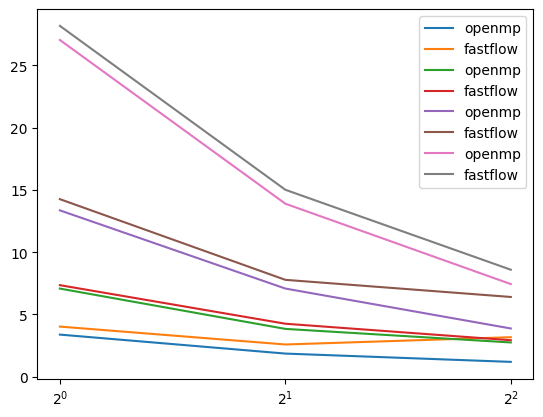

In [10]:
import matplotlib.pyplot as plt

omp = df[df["backend"] == "omp"]
ff = df[df["backend"] == "ff"]


for e in omp["estimators"].unique():
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]
    plt.plot(omp_e["threads"], omp_e["train_time"], label="openmp")
    plt.plot(ff_e["threads"], ff_e["train_time"], label="fastflow")

plt.xscale("log", base=2)
plt.legend()
plt.show()

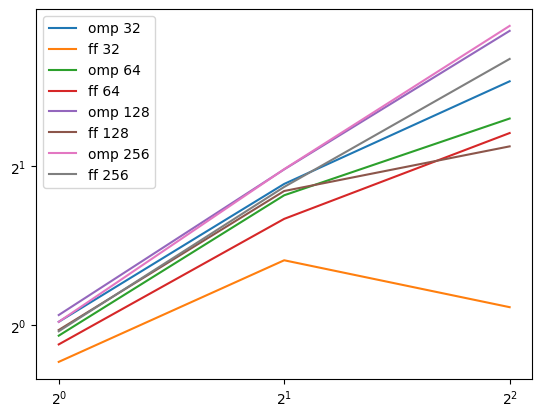

In [13]:
for e in omp["estimators"].unique():
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]
    plt.plot(omp_e["threads"], omp_e["train_speedup"], label=f"omp {e}")
    plt.plot(ff_e["threads"], ff_e["train_speedup"], label=f"ff {e}")

plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.legend()
plt.show()